In [50]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

import seaborn as sns
import pickle
from pandas_profiling import ProfileReport
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,ElasticNet,LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix , roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [53]:
# ProfileReport(df)

In [7]:
#There are Zeroes values in 5columns so replace them with their mean

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df['Pregnancies'] = df['Pregnancies'].replace(0,df['Pregnancies'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())

In [54]:
# ProfileReport(df)   #Check the Report again

In [11]:
#Plot Boxplot for outliers

<AxesSubplot:>

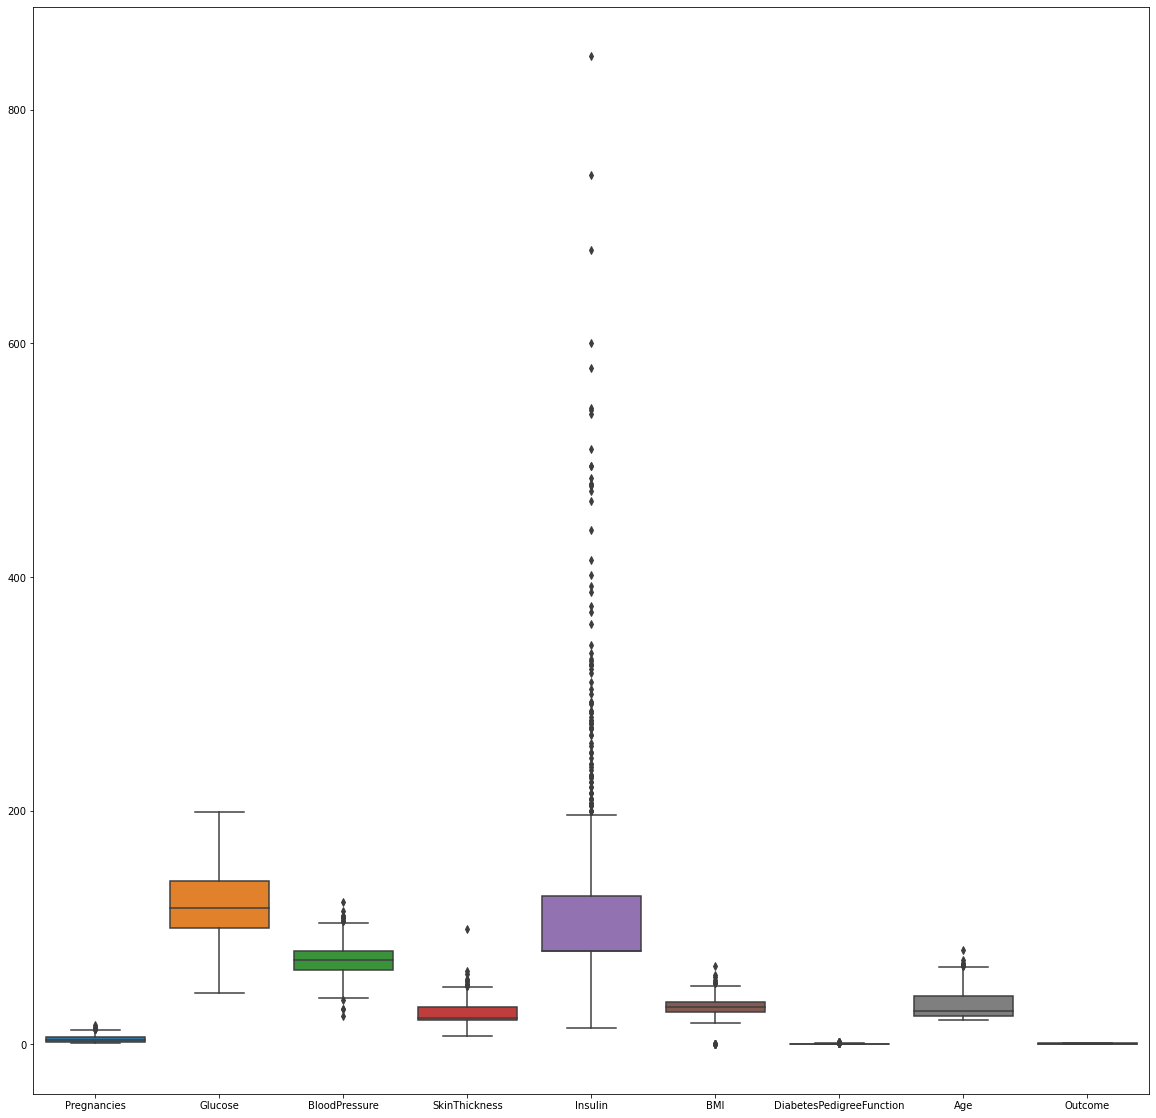

In [51]:
fig,ax=plt.pyplot.subplots(figsize=(20,20))
sns.boxplot(data=df,ax=ax)

In [13]:
#Now remove the outliers 

In [14]:
q = df['Pregnancies'].quantile(.98)
df_new = df[df['Pregnancies']<q]

In [15]:
q = df['BMI'].quantile(.99)
df_new = df_new[df_new['BMI']<q]

In [16]:
q = df['SkinThickness'].quantile(.99)
df_new = df_new[df_new['SkinThickness']<q]

In [17]:
q = df['Insulin'].quantile(.95)
df_new = df_new[df_new['Insulin']<q]

In [18]:
q = df['DiabetesPedigreeFunction'].quantile(.99)
df_new = df_new[df_new['DiabetesPedigreeFunction']<q]

In [19]:
q = df['Age'].quantile(.99)
df_new = df_new[df_new['Age']<q]

In [20]:
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5.0,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2.0,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.0,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


<AxesSubplot:>

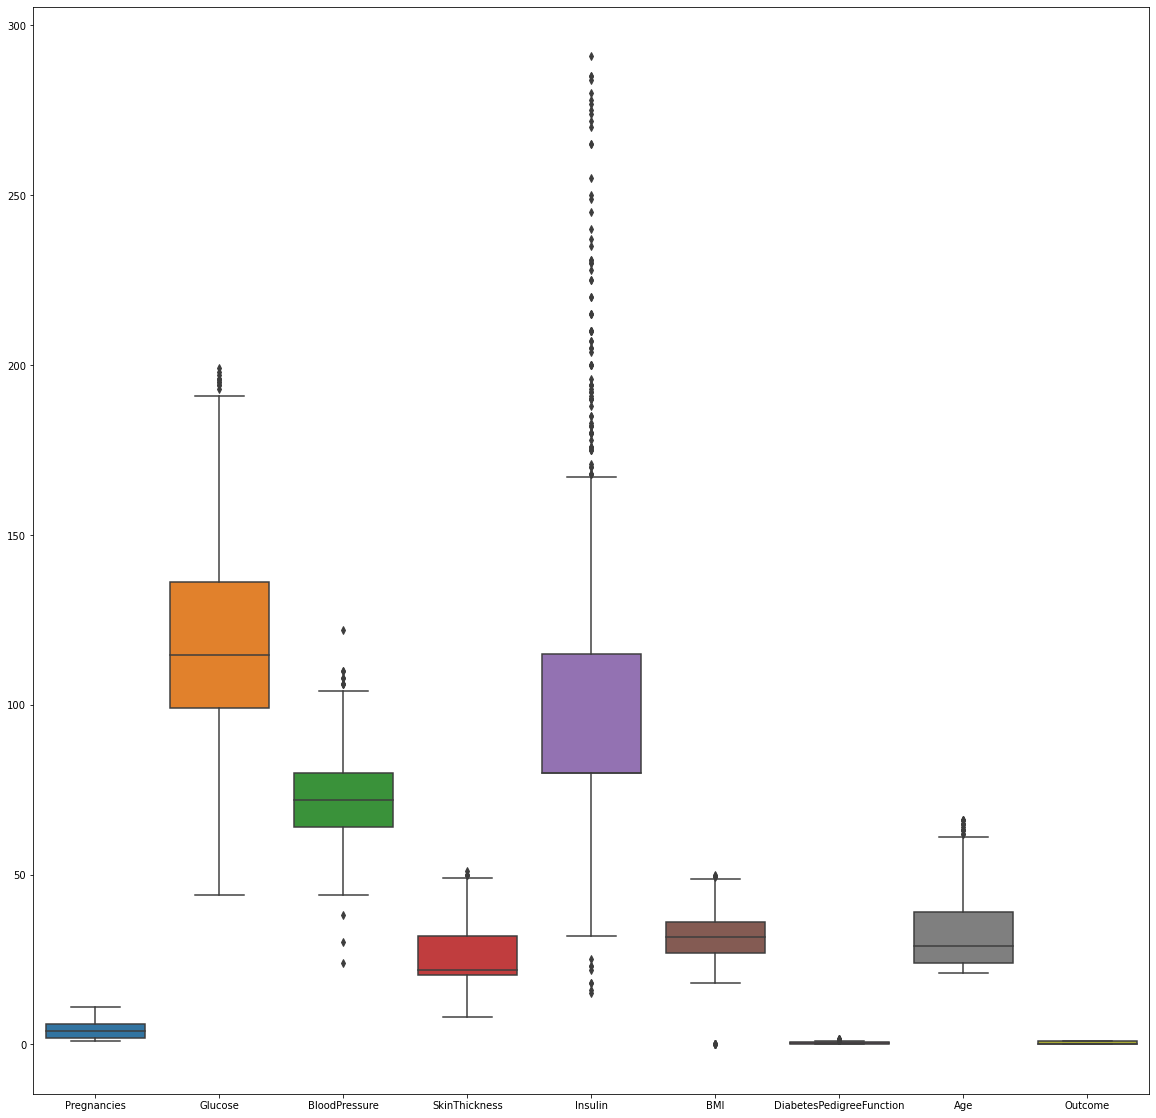

In [52]:
#Check again  the box plot
fig,ax=plt.pyplot.subplots(figsize=(20,20))
sns.boxplot(data=df_new,ax=ax)

In [22]:
#Standard Scaling

In [23]:
x = df_new.drop(columns=['Outcome'])
y = df_new['Outcome']

In [24]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled,columns = x.columns)

In [25]:
df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.710502,0.988184,-0.002277,1.054582,-0.438841,0.283399,0.606953,1.610682
1,-1.197360,-1.168675,-0.507825,0.362698,-0.438841,-0.665984,-0.340466,-0.127396
2,1.473647,2.186439,-0.676341,-0.613268,-0.438841,-1.113551,0.761423,-0.035918
3,-1.197360,-1.031731,-0.507825,-0.329187,-0.152817,-0.462545,-0.972078,-1.042174
4,0.328929,-0.107363,0.166239,-0.613268,-0.438841,-0.801611,-0.855367,-0.218874
...,...,...,...,...,...,...,...,...
675,2.236791,-0.620901,0.334755,2.553666,1.579376,0.188461,-0.958348,2.799893
676,-0.815788,0.098052,-0.170793,0.132070,-0.438841,0.717403,-0.378225,-0.493307
677,0.328929,0.063816,-0.002277,-0.329187,0.209735,-0.720235,-0.704330,-0.218874
678,-1.197360,0.234995,-1.013373,-0.613268,-0.438841,-0.191293,-0.347331,1.336248


In [26]:
#Check again  the box plot 
fig,ax=plt.pyplot.subplots(figsize=(20,20))
sns.boxplot(data=df_scaled,ax=ax)   #All Boxes are at the same Standard

<AxesSubplot:>

In [27]:
#Check Multicollinearity
def vif_score(x,x_scaled):
    return pd.DataFrame([ [x.columns[i],variance_inflation_factor(x_scaled,i)] for i in range(x_scaled.shape[1])] , columns = ('FEATURE','VIF_SCORE'))
    

In [28]:
vif_score(x,x_scaled)

,FEATURE,VIF_SCORE
0,Pregnancies,1.419437
1,Glucose,1.312746
2,BloodPressure,1.242075
3,SkinThickness,1.419748
4,Insulin,1.278646
5,BMI,1.430717
6,DiabetesPedigreeFunction,1.044110
7,Age,1.585458


In [29]:
x_train , x_test , y_train,y_test = train_test_split(df_scaled,y,test_size = .20 , random_state = 144)

In [30]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
224,-0.434215,-0.278543,-1.350405,1.515839,-0.438841,-0.191293,0.366665,-0.218874
59,-0.052643,0.919712,1.093077,0.132070,-0.031967,-0.354044,-0.896559,-0.493307
353,1.855219,-1.613741,0.503271,-0.098558,-0.438841,0.012147,-0.584186,0.512948
486,0.710502,-0.175835,1.345851,-0.613268,-0.438841,-0.503233,-0.697464,3.074326
467,-0.111767,-0.415486,0.334755,-0.613268,-0.438841,1.870225,0.809480,-0.767741
...,...,...,...,...,...,...,...,...
643,-0.815788,1.912552,1.345851,-0.613268,-0.438841,-1.167801,-0.426283,-0.950696
422,-0.111767,0.132288,1.345851,1.285211,-0.438841,0.500401,-0.869098,-0.310352
216,1.855219,2.220675,1.093077,-1.251699,-0.438841,-0.204855,2.618501,1.519204
444,2.236791,-1.511033,0.840303,-0.613268,-0.438841,0.242711,-0.642541,0.512948


In [31]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
352,0.328929,0.577354,1.008819,1.746467,-0.273668,0.473276,-0.563590,0.238515
446,-1.197360,0.371939,-1.013373,-0.329187,1.377958,-0.394732,0.830077,-1.042174
21,2.618364,0.817005,1.851399,0.823954,0.894555,0.690277,-0.673435,1.702159
664,-1.197360,0.063816,0.503271,1.515839,-0.555653,1.015780,-0.649407,-0.401830
390,-0.052643,-0.073127,-0.844857,-1.597642,-0.438841,-0.245543,-0.240918,-0.218874
...,...,...,...,...,...,...,...,...
393,-0.111767,-0.518194,-0.676341,1.285211,-0.757071,0.283399,0.205330,-0.950696
498,-0.111767,-0.963260,0.671787,-0.613268,-0.438841,0.120647,0.517703,-0.493307
50,-0.815788,-1.202911,-0.246164,-0.613268,-0.438841,-4.273640,-0.501802,-1.042174
84,-1.197360,-1.647977,-2.024469,-0.905757,-0.515369,-1.506867,-0.436581,-0.950696


In [32]:
y_train

256    0
69     0
403    0
552    0
531    0
      ..
728    0
481    0
245    1
505    0
410    0
Name: Outcome, Length: 544, dtype: int64

In [33]:
y_test

402    1
507    0
24     1
751    0
444    1
      ..
448    1
564    0
60     0
97     0
353    0
Name: Outcome, Length: 136, dtype: int64

In [34]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression (random_state = 0)
log.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [35]:
from sklearn. metrics import confusion_matrix
cm = confusion_matrix(y_test, log.predict(x_test) )
TP = cm[1][1]
TN = cm[0][0]
FN = cm[1][0]
FP = cm[0][1]
print (cm)
print ( 'Testing Accuracy = ', (TP + TN) / (TP + TN + FP + FN) )

[[84 10]
 [23 19]]
Testing Accuracy =  0.7573529411764706


In [36]:
def model_eval(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    specificity=tn/(fp+tn)
    F1_Score = 2*(recall * precision) / (recall + precision)
    result={"Accuracy":accuracy,"Precision":precision,"Recall":recall,'Specficity':specificity,'F1':F1_Score}
    return result

model_eval(y_test,log.predict(x_test))

{'Accuracy': 0.7573529411764706,
 'Precision': 0.6551724137931034,
 'Recall': 0.4523809523809524,
 'Specficity': 0.8936170212765957,
 'F1': 0.5352112676056338}

In [37]:
roc_auc_score(y_test,log.predict(x_test))

0.672998986828774

In [38]:
fpr, tpr, thresholds  = roc_curve(y_test,log.predict(x_test))
auc = roc_auc_score(y_test,log.predict(x_test))

plt.pyplot.plot(fpr, tpr, color='orange', label='ROC')
plt.pyplot.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.pyplot.xlabel('False Positive Rate')
plt.pyplot.ylabel('True Positive Rate')
plt.pyplot.title('Receiver Operating Characteristic (ROC) Curve')
plt.pyplot.legend()
plt.pyplot.show()

C:\Users\rumma\AppData\Local\Temp/ipykernel_21060/1196591685.py:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.pyplot.show()


In [39]:
#checking with other Algorithms

In [40]:
#DECision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model_p = DecisionTreeClassifier()
dt_model_p.fit(x_train,y_train)
dt_model_p.score(x_test,y_test)

0.7205882352941176

In [41]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators = 10, criterion = 'entropy' , random_state = 0)
forest.fit (x_train, y_train)
forest.score (x_test, y_test) 

0.8014705882352942

In [42]:
#SVM
from sklearn.svm import SVC # "Support vector classifier"  
dt_model_svm = SVC(kernel='linear', random_state=0)
dt_model_svm .fit(x_train ,y_train)
dt_model_svm .score(x_test ,y_test)

0.7573529411764706

In [43]:
#knn
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
neigh.score(x_test,y_test)

0.7426470588235294

In [44]:
#XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xg_boost = XGBClassifier(n_estimators=15)
xg_boost.fit(x_train, y_train)
xg_boost.score(x_test,y_test)

0.7794117647058824

In [45]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=11)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7573529411764706

In [46]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
model_gb = GradientBoostingClassifier(n_estimators=10)
model_gb.fit(x_train, y_train)
model_gb.score(x_test,y_test)

0.7573529411764706

In [47]:
from sklearn.ensemble import HistGradientBoostingClassifier
model_gbh = HistGradientBoostingClassifier(learning_rate=0.02)
model_gbh.fit(x_train, y_train)
model_gbh.score(x_test,y_test)

0.7720588235294118

In [48]:
#lgbm
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(x_train, y_train)
lgbm.score(x_test,y_test)

0.8014705882352942

In [49]:
#Ensembled Learning
from sklearn.ensemble import VotingClassifier
clf = AdaBoostClassifier(n_estimators=11)
xg_boost = XGBClassifier(n_estimators=15)
model_gbh = HistGradientBoostingClassifier(learning_rate=0.02)
model_gb = GradientBoostingClassifier(n_estimators=10)
lgbm = LGBMClassifier()

model = VotingClassifier(estimators=[('clf', clf),('xg',xg_boost),('gbh',model_gbh),('gb',model_gb),('lg',lgbm)], voting='hard')
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7867647058823529